# Chapter 2 사례 소개

- CopyRight to Python for Data Analysis - 웨스 맥키니 - OREILLY, 한빛 미디어
- Typing and Studying by SGH in 2019.12.27
- URL : https://github.com/wesm/pydata-book
- URL : https://github.com/wikibook/python-for-data-analysis

# 2.1 bit.ly의 1.usa.gov

In [1]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [2]:
import json
records = [json.loads(line) for line in open(path,'rt', encoding='UTF8')]
print(len(records))
print(records[0])

3560
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}


In [3]:
print(records[0]['tz'])

America/New_York


```python
time_zones = [rec['tz'] for rec in records] # KeyError : 'tz'
# records에는 tz가 없는 경우도 있기 때문에 에러가 난다.
```

In [4]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
print(time_zones[:10])

['America/New_York', 'America/Denver', 'America/New_York', 'America/Sao_Paulo', 'America/New_York', 'America/New_York', 'Europe/Warsaw', '', '', '']


In [5]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts
counts = get_counts(time_zones)
print(len(counts))
print(counts['America/New_York'])
print(len(time_zones))

97
1251
3440


In [6]:
print(type(counts))
print(counts.items())

<class 'dict'>
dict_items([('America/New_York', 1251), ('America/Denver', 191), ('America/Sao_Paulo', 33), ('Europe/Warsaw', 16), ('', 521), ('America/Los_Angeles', 382), ('Asia/Hong_Kong', 10), ('Europe/Rome', 27), ('Africa/Ceuta', 2), ('Europe/Madrid', 35), ('Asia/Kuala_Lumpur', 3), ('Asia/Nicosia', 1), ('Europe/London', 74), ('Pacific/Honolulu', 36), ('America/Chicago', 400), ('Europe/Malta', 2), ('Europe/Lisbon', 8), ('Europe/Paris', 14), ('Europe/Copenhagen', 5), ('America/Mazatlan', 1), ('Europe/Dublin', 3), ('Europe/Brussels', 4), ('America/Vancouver', 12), ('Europe/Amsterdam', 22), ('Europe/Prague', 10), ('Europe/Stockholm', 14), ('America/Anchorage', 5), ('Asia/Bangkok', 6), ('Europe/Berlin', 28), ('America/Rainy_River', 25), ('Europe/Budapest', 5), ('Asia/Tokyo', 37), ('Europe/Vienna', 6), ('America/Phoenix', 20), ('Asia/Jerusalem', 3), ('Asia/Karachi', 3), ('America/Bogota', 3), ('America/Indianapolis', 20), ('America/Montreal', 9), ('Asia/Calcutta', 9), ('Europe/Skopje', 1)

In [7]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz,count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]
print(top_counts(counts))

[(33, 'America/Sao_Paulo'), (35, 'Europe/Madrid'), (36, 'Pacific/Honolulu'), (37, 'Asia/Tokyo'), (74, 'Europe/London'), (191, 'America/Denver'), (382, 'America/Los_Angeles'), (400, 'America/Chicago'), (521, ''), (1251, 'America/New_York')]


In [8]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [9]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
print(frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB
None


In [10]:
print(frame['tz'][:10])

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object


In [11]:
tz_counts = frame['tz'].value_counts()
print(tz_counts[:10])

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64


In [12]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
print(tz_counts[:10])

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

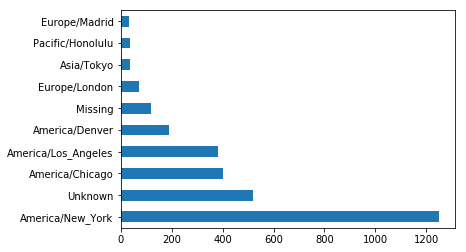

In [14]:
tz_counts[:10].plot(kind='barh', rot=0)

In [15]:
frame.columns

Index(['a', 'c', 'nk', 'tz', 'gr', 'g', 'h', 'l', 'al', 'hh', 'r', 'u', 't',
       'hc', 'cy', 'll', '_heartbeat_', 'kw'],
      dtype='object')

In [16]:
print(frame['a'][1]) # a : HTML agents
print(frame['a'][50])
print(frame['a'][51])

GoogleMaps/RochesterNY
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1


In [17]:
results = Series([x.split()[0] for x in frame.a.dropna()])
print(results[:5],'\n')
print(results.value_counts()[:8])

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object 

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64


In [18]:
cframe = frame[frame.a.notnull()]
cframe.a.describe()

count                                                  3440
unique                                                  761
top       Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
freq                                                    309
Name: a, dtype: object

In [19]:
len(cframe)

3440

In [20]:
import numpy as np

operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
print(operating_system[:5])

['Windows' 'Not Windows' 'Windows' 'Not Windows' 'Windows']


In [21]:
cframe['a'].str.contains('Windows')[:10]

0     True
1    False
2     True
3    False
4     True
5     True
6     True
7     True
8    False
9     True
Name: a, dtype: bool

In [22]:
by_tz_os = cframe.groupby(['tz', operating_system])
print(by_tz_os.size(),'\n')
print(by_tz_os.size().unstack())

tz                            
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64 

                     Not Windows  Windows
tz                                       
                           245.0    276.0
Africa/Cairo                 NaN      3.0
Africa/Casablanca            NaN      1.0
Africa/Ceuta                 NaN      2.0
Africa/Johannesburg          NaN      1.0
...                          ...      ...
Europe/Volgograd             NaN      1.0
Europe/Warsaw                1.0     15.0
Europe/Zurich                4.0      NaN
Pacific/Auckland             3.0      8.0
Pacific/Honolulu   

In [23]:
agg_counts = by_tz_os.size().unstack().fillna(0)
print(agg_counts[:10])

                                Not Windows  Windows
tz                                                  
                                      245.0    276.0
Africa/Cairo                            0.0      3.0
Africa/Casablanca                       0.0      1.0
Africa/Ceuta                            0.0      2.0
Africa/Johannesburg                     0.0      1.0
Africa/Lusaka                           0.0      1.0
America/Anchorage                       4.0      1.0
America/Argentina/Buenos_Aires          1.0      0.0
America/Argentina/Cordoba               0.0      1.0
America/Argentina/Mendoza               0.0      1.0


In [24]:
indexer = agg_counts.sum(1).argsort()
print(len(indexer))
print(indexer[:10])

97
tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64


In [25]:
sorted(Counter(agg_counts.sum(1)).items())

[(1.0, 29),
 (2.0, 9),
 (3.0, 10),
 (4.0, 7),
 (5.0, 4),
 (6.0, 6),
 (8.0, 1),
 (9.0, 3),
 (10.0, 6),
 (11.0, 1),
 (12.0, 1),
 (14.0, 2),
 (15.0, 1),
 (16.0, 1),
 (20.0, 2),
 (22.0, 1),
 (25.0, 1),
 (27.0, 1),
 (28.0, 1),
 (33.0, 1),
 (35.0, 1),
 (36.0, 1),
 (37.0, 1),
 (74.0, 1),
 (191.0, 1),
 (382.0, 1),
 (400.0, 1),
 (521.0, 1),
 (1251.0, 1)]

In [26]:
count_subset = agg_counts.take(indexer)[-10:]
print(count_subset)

                     Not Windows  Windows
tz                                       
America/Sao_Paulo           13.0     20.0
Europe/Madrid               16.0     19.0
Pacific/Honolulu             0.0     36.0
Asia/Tokyo                   2.0     35.0
Europe/London               43.0     31.0
America/Denver             132.0     59.0
America/Los_Angeles        130.0    252.0
America/Chicago            115.0    285.0
                           245.0    276.0
America/New_York           339.0    912.0


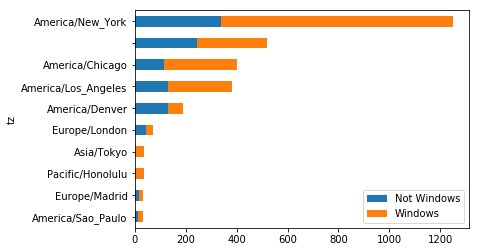

In [27]:
count_subset.plot(kind='barh', stacked=True)

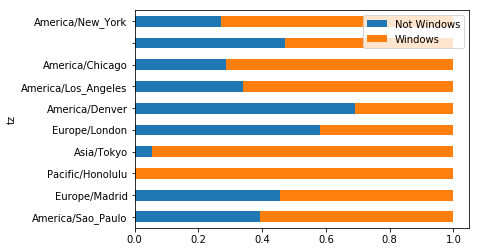

In [28]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

In [29]:
print(type(agg_counts))
print(type(count_subset))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# 2.2 MovieLens의 영화 평점 데이터

In [30]:
import pandas as pd
import os
encoding = 'latin1'

upath = os.path.expanduser('./ch02/movielens/users.dat')
rpath = os.path.expanduser('./ch02/movielens/ratings.dat')
mpath = os.path.expanduser('./ch02/movielens/movies.dat')

unames = ['user_id','gender','age','occupation', 'zip']
rnames = ['user_id','movie_id','rating','timestamp']
mnames = ['movie_id','title','genres']

users = pd.read_csv(upath, sep='::', header=None, engine='python', names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, engine='python', names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, engine='python', names=mnames, encoding=encoding)

```python
#아래와 같이 바로 불러오는 것 또한 가능
users = pd.read_csv('ch02/movielens/users.dat', sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_table('ch02/movielens/ratings.dat', sep='::', header=None, names=rnames)
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None, names=mnames)
```

In [31]:
print(users[:5],'\n')
print(ratings[:5],'\n')
print(movies[:5],'\n')

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455 

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291 

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy 



In [32]:
print(len(users))
print(len(ratings))
print(len(movies))

6040
1000209
3883


In [33]:
data = pd.merge(pd.merge(ratings,users),movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [34]:
print(data.loc[0])
# print(data.iloc[0])

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object


In [35]:
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean')
print(mean_ratings[:5])

gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024


In [36]:
ratings_by_title = data.groupby('title').size()
print(len(ratings_by_title))
print(ratings_by_title[:10])

3706
title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64


In [37]:
activate_titles = ratings_by_title.index[ratings_by_title >= 250]
print(activate_titles)

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)


In [38]:
mean_ratings = mean_ratings.loc[activate_titles]
print(mean_ratings)

gender                                    F         M
title                                                
'burbs, The (1989)                 2.793478  2.962085
10 Things I Hate About You (1999)  3.646552  3.311966
101 Dalmatians (1961)              3.791444  3.500000
101 Dalmatians (1996)              3.240000  2.911215
12 Angry Men (1957)                4.184397  4.328421
...                                     ...       ...
Young Guns (1988)                  3.371795  3.425620
Young Guns II (1990)               2.934783  2.904025
Young Sherlock Holmes (1985)       3.514706  3.363344
Zero Effect (1998)                 3.864407  3.723140
eXistenZ (1999)                    3.098592  3.289086

[1216 rows x 2 columns]


In [39]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
print(top_female_ratings[:10])

gender                                                     F         M
title                                                                 
Close Shave, A (1995)                               4.644444  4.473795
Wrong Trousers, The (1993)                          4.588235  4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075
Schindler's List (1993)                             4.562602  4.491415
Shawshank Redemption, The (1994)                    4.539075  4.560625
Grand Day Out, A (1992)                             4.537879  4.293255
To Kill a Mockingbird (1962)                        4.536667  4.372611
Creature Comforts (1990)                            4.513889  4.272277
Usual Suspects, The (1995)                          4.513317  4.518248


In [40]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [41]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [42]:
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[activate_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# 2.3 신생아 이름

In [43]:
import pandas as pd

names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [44]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [45]:
years = range(1880, 2011)
print(years)
print(type(years))

range(1880, 2011)
<class 'range'>


In [46]:
pieces = []
columns = names1880.columns
for year in years:
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
names = pd.concat(pieces, ignore_index=False)

In [47]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [48]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


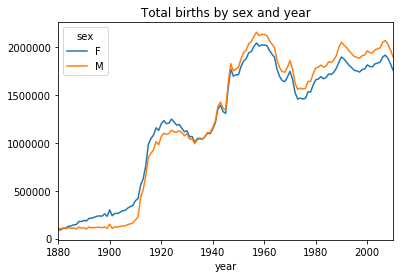

In [49]:
total_births.plot(title='Total births by sex and year')

In [50]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

In [51]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
33833,Zymaire,M,5,2010,0.000003
33834,Zyonne,M,5,2010,0.000003
33835,Zyquarius,M,5,2010,0.000003
33836,Zyran,M,5,2010,0.000003


In [52]:
names.groupby(['year','sex']).size()

year  sex
1880  F        942
      M       1058
1881  F        938
      M        997
1882  F       1028
             ...  
2008  M      14590
2009  F      20123
      M      14479
2010  F      19698
      M      14140
Length: 262, dtype: int64

In [53]:
names.loc[names['year'] == 2010]

,name,sex,births,year,prop
0,Isabella,F,22731,2010,0.012923
1,Sophia,F,20477,2010,0.011641
2,Emma,F,17179,2010,0.009766
3,Olivia,F,16860,2010,0.009585
4,Ava,F,15300,2010,0.008698
...,...,...,...,...,...
33833,Zymaire,M,5,2010,0.000003
33834,Zyonne,M,5,2010,0.000003
33835,Zyquarius,M,5,2010,0.000003
33836,Zyran,M,5,2010,0.000003


In [54]:
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [55]:
np.allclose(names.prop.sum(),1)

False

In [56]:
names.prop.sum()

262.0000000000001

In [57]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [58]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [59]:
pieces = []
for year, group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [60]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [61]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA59D99888>,
      dtype=object)

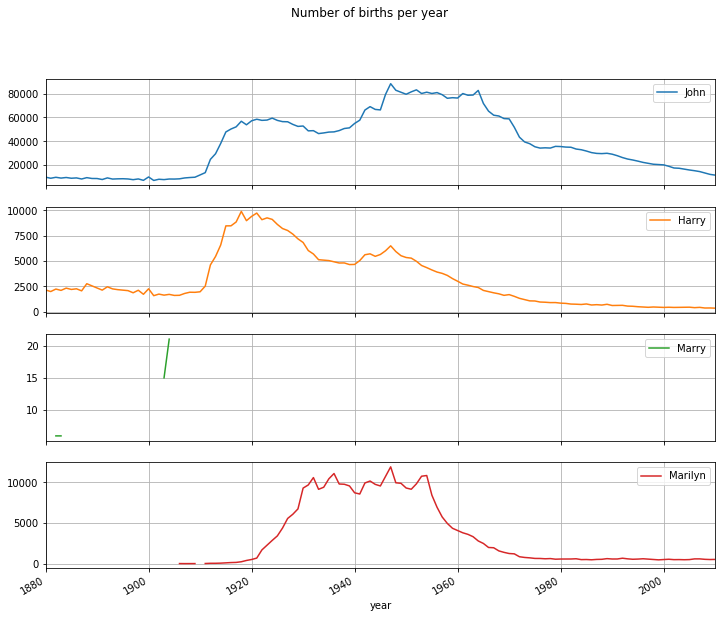

In [62]:
subset = total_births[['John','Harry','Marry','Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=True, title='Number of births per year')

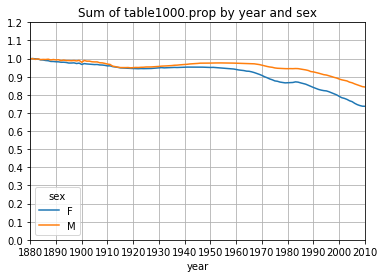

In [63]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13),\
           xticks=range(1880, 2020, 10), grid=True)

In [64]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [65]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [66]:
type(prop_cumsum)

pandas.core.series.Series

In [67]:
prop_cumsum.values.searchsorted(0.5) #cumsum

116

In [68]:
df.iloc[116]

name         Kaleb
sex              M
births        3400
year          2010
prop      0.001791
Name: 260993, dtype: object

In [69]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [70]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
print(diversity.shape, diversity.index)
diversity = diversity.unstack('sex')
diversity.head()

(262,) MultiIndex([(1880, 'F'),
            (1880, 'M'),
            (1881, 'F'),
            (1881, 'M'),
            (1882, 'F'),
            (1882, 'M'),
            (1883, 'F'),
            (1883, 'M'),
            (1884, 'F'),
            (1884, 'M'),
            ...
            (2006, 'F'),
            (2006, 'M'),
            (2007, 'F'),
            (2007, 'M'),
            (2008, 'F'),
            (2008, 'M'),
            (2009, 'F'),
            (2009, 'M'),
            (2010, 'F'),
            (2010, 'M')],
           names=['year', 'sex'], length=262)


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


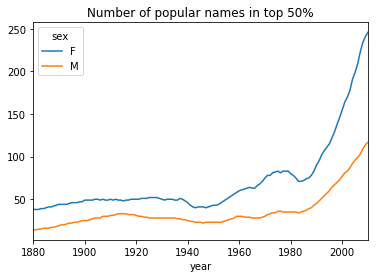

In [71]:
diversity.plot(title='Number of popular names in top 50%')

### 마지막 글자의 변화

In [72]:
get_last_letter = lambda x:x[-1]
last_latters = names.name.map(get_last_letter)
last_latters.name = 'last_letter'

table = names.pivot_table('births', index=last_latters, columns=['sex','year'], aggfunc=sum)

In [73]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [74]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [75]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [76]:
letter_prop = subtable / subtable.sum().astype(float)

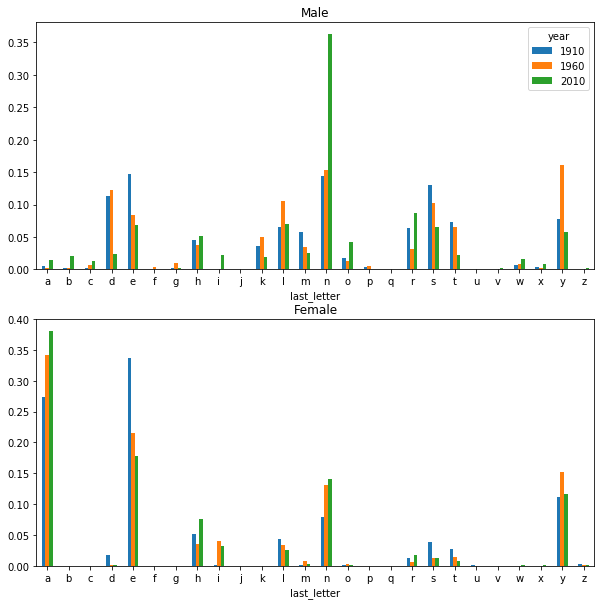

In [77]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1, figsize=(10,10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

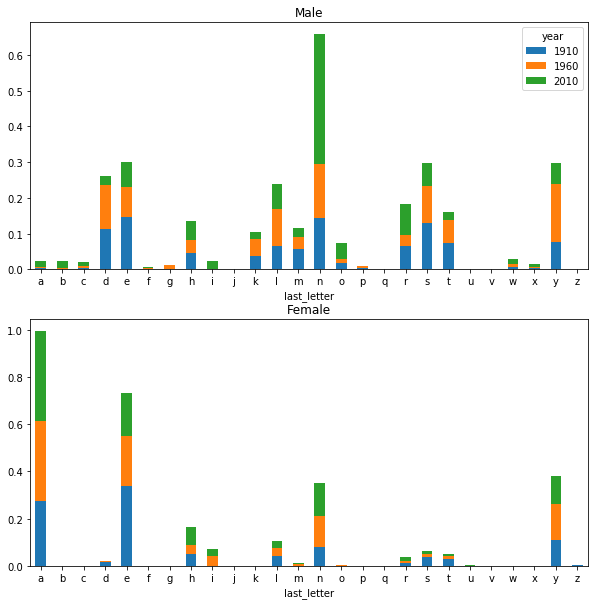

In [78]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1, figsize=(10,10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male', stacked=True)
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False, stacked=True)

In [79]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d','n','y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


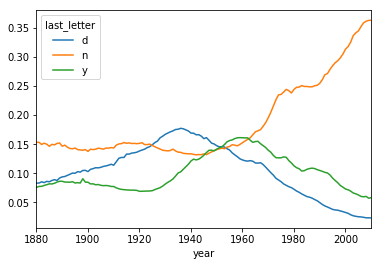

In [80]:
dny_ts.plot()

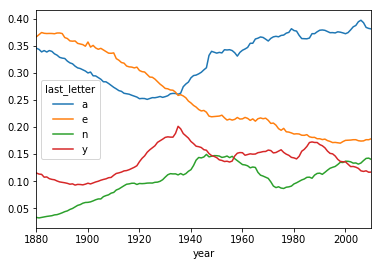

In [81]:
dny_ts2 = letter_prop.loc[['a','e','n','y'], 'F'].T
dny_ts2.plot()

In [82]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [83]:
all_names.shape

(6868,)

In [84]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [85]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
print(table.head())
table = table.div(table.sum(1), axis=0)
table.tail()

sex      F      M
year             
1880   8.0   79.0
1881  11.0   92.0
1882   9.0  128.0
1883   7.0  125.0
1884  15.0  125.0


sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


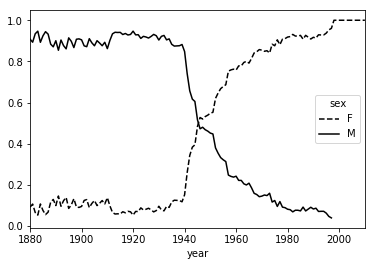

In [86]:
table.plot(style={'M':'k-', 'F':'k--'})